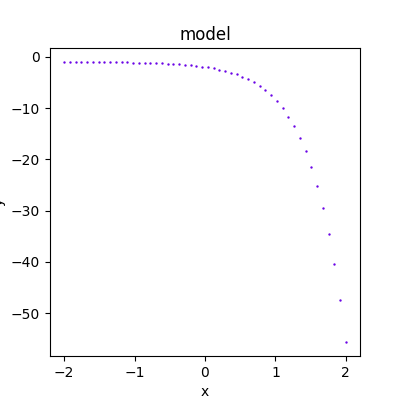

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from math import e

def pro(xi,c1,c2,c3):
    return c1+c2*e**(c3*xi)

c1=np.random.randint(-4,4)
c2=np.random.randint(-4,4)
c3=np.random.randint(-4,4)

xi=np.linspace(-2,2,50)
yi=pro(xi,c1,c2,c3)

plt.figure(figsize=(4,4))

plt.scatter(xi,yi,s=2,c="#6800e6",marker='.')
plt.title("model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [136]:
from numpy.linalg import norm, inv

def computeDf(c, x):
    '''
    This computes the jacobian matrix Df given a vector of 
    possible parameters c and a vector of observations x
    c[0] = a
    c[1] = b
    '''
    Df = np.zeros((len(x), len(c))) # Check that this is correct
    Df[:, 0] = 1
    Df[:, 1] = e**(c[2]*x)
    Df[:, 2] = x*c[1]*e**(c[2]*x)
    return Df

def GaussNewton(c0, x, y):
    '''
    Gauss Newton method to fit the Michaelis–Menten model for enzyme kinetics
    given some observations y
    and a starting guess to the parameters c0
    '''
    maxIter = 1000  # a good idea for methods like this one is to set a maximum number of iterations allowed
    tol = 1e-2 # another good idea for methods like this is to set a tolerance
    Df = computeDf(c0, x) # initial jacobian matrix
    f = pro(x, *c0.T) # f(c0)
    res = y - f # residuals from the initial point
    i = 1 # number of iterations done so far
    c = c0
    while(  norm( np.matmul(Df.T, res)  ) > tol and i < maxIter  ):
        # We want to iterate until we get a "good" approximation to the true parameters
        c = c + np.matmul( inv( np.matmul(Df.T, Df) ) , np.matmul(Df.T, np.subtract(y, f) )  )
        # Update Df, f, res, i
        Df = computeDf(c, x)
        f = pro(x, *c.T)
        res = y - f
        i += 1
    return c, i, res
yi=pro(xi,c1,c2,c3)
c0 = np.array( [1,1,1] )

c, i, res = GaussNewton(c0, xi, yi)
print("Parameters found with Gauss-Newton: ", c)
print("Number of iterations done ", i)


Parameters found with Gauss-Newton:  [-1. -1.  2.]
Number of iterations done  12


In [137]:
n=np.random.randn()
def prop(xi,c1,c2,c3):
    return c1+c2*e**(c3*xi)+n
yii=prop(xi,c1,c2,c3)
cnew, i, res = GaussNewton(c0, xi, yii)
print("Parameters found with Gauss-Newton: ", cnew)
print("Number of iterations done ", i)

Parameters found with Gauss-Newton:  [ 1.29970672 -1.          2.        ]
Number of iterations done  12


MMSE: 146.96910405444055


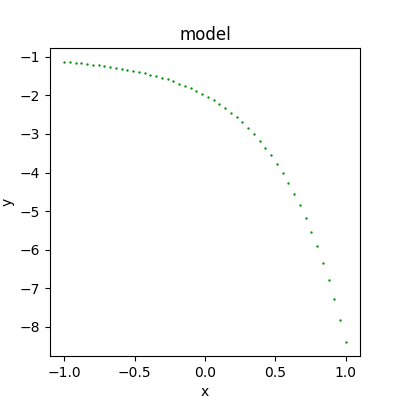

In [138]:
xi=np.linspace(-1,1,50)
yi2=pro(xi,c[0],c[1],c[2])
MSE = np.square(np.subtract(yi,yi2)).mean()
print("MMSE:",MSE)
plt.figure(figsize=(4,4))
plt.scatter(xi,yi2,s=2,c="#019006",marker='.')
plt.title("model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

MMSE: 177.06536810323323



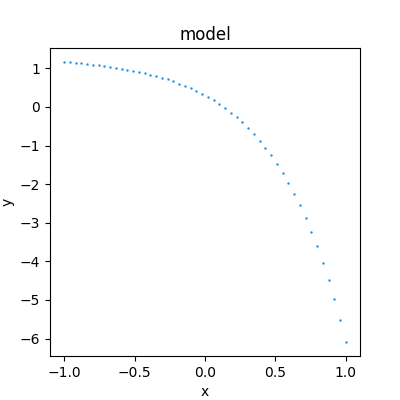

In [139]:
xi=np.linspace(-1,1,50)
yi3=pro(xi,cnew[0],cnew[1],cnew[2])
MSE = np.square(np.subtract(yi,yi3)).mean()
print("MMSE:",MSE)
print()
plt.figure(figsize=(4,4))
plt.scatter(xi,yi3,s=2,c="#1890e6",marker='.')
plt.title("model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()